# Gráficos

Este caderno será usado para a criação dos gráficos.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker

In [22]:
df = pd.read_csv('chuvas_anual.csv')
df.dtypes

sub_basin      int64
year           int64
total        float64
dtype: object

### Todas as sub-bacias em um único gráfico para comparação visual

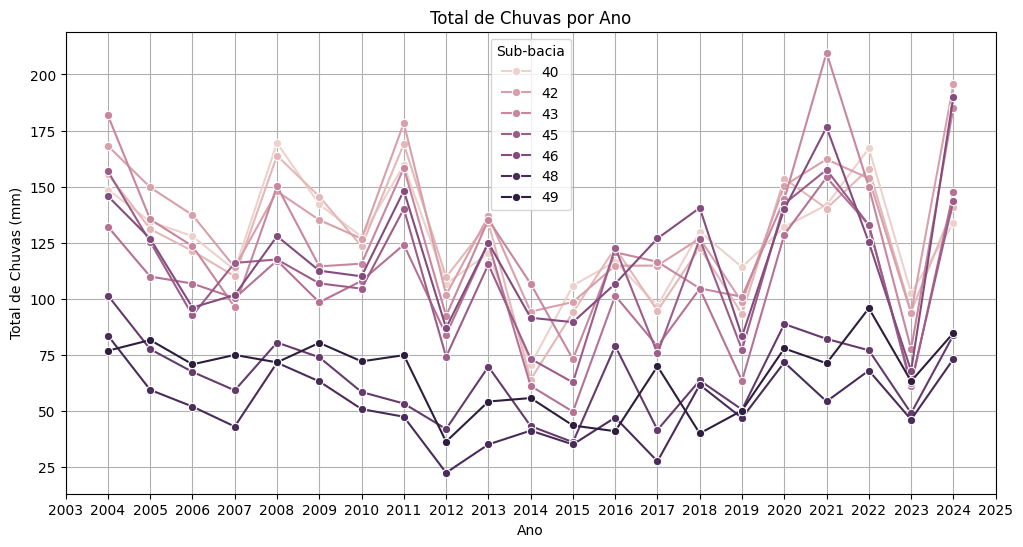

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='total', hue='sub_basin', marker='o', data=df)

plt.xticks(df.year)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.xlabel('Ano')
plt.ylabel('Total de Chuvas (mm)')
plt.title('Total de Chuvas por Ano')
plt.legend(title='Sub-bacia')
plt.grid(True)
plt.show()

### Aqui geramos um gráfico por sub-bacia, com suas precipitações anuais, média ao longo do período e linha de tendência.

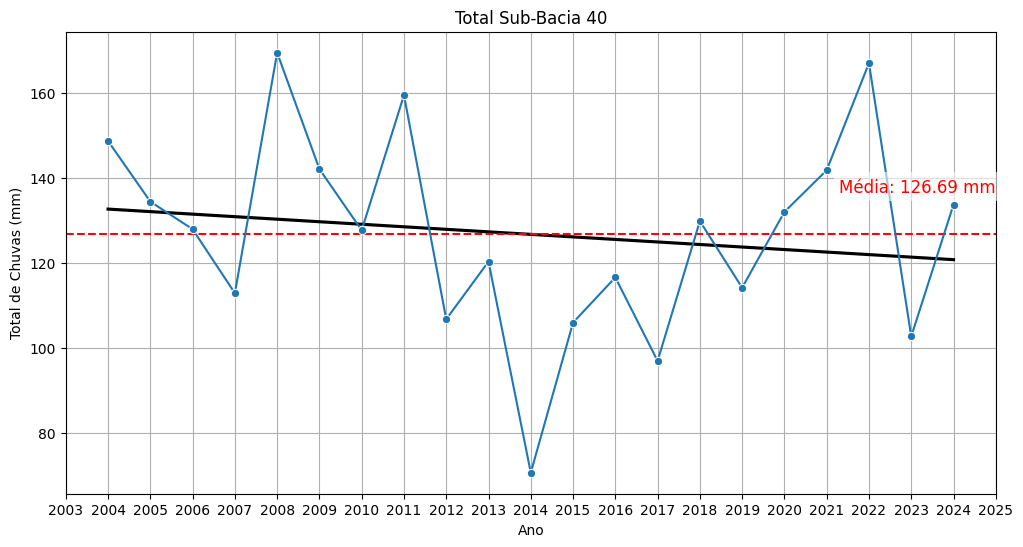

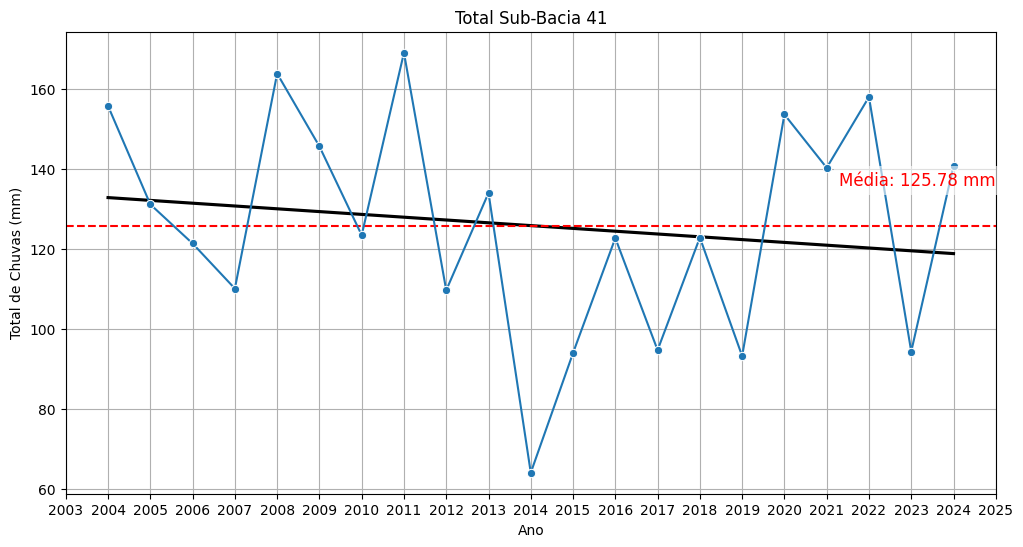

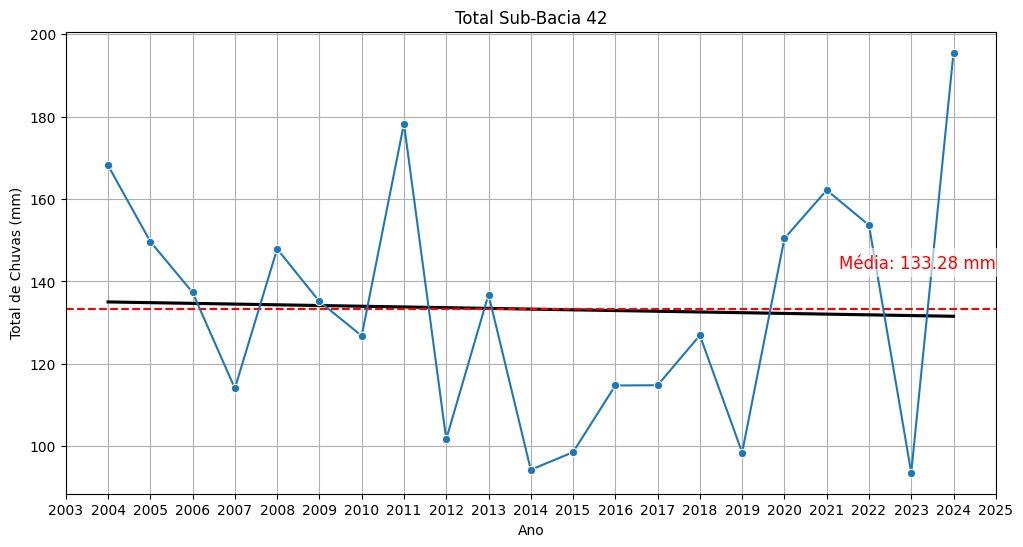

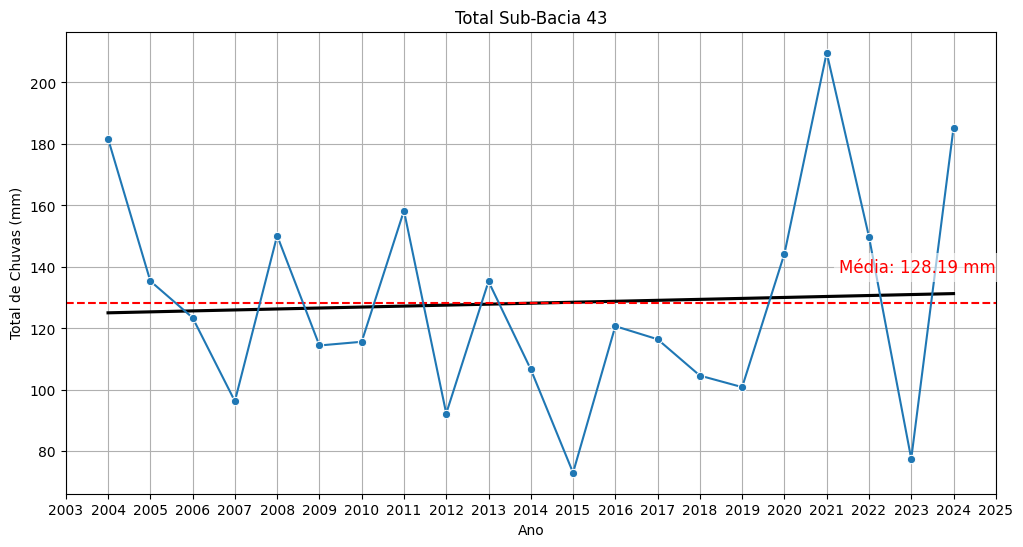

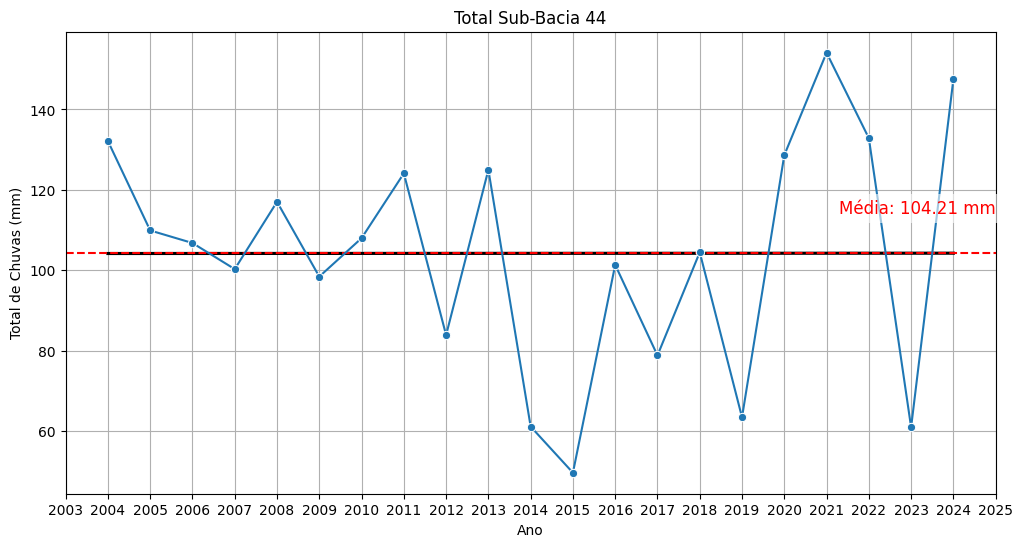

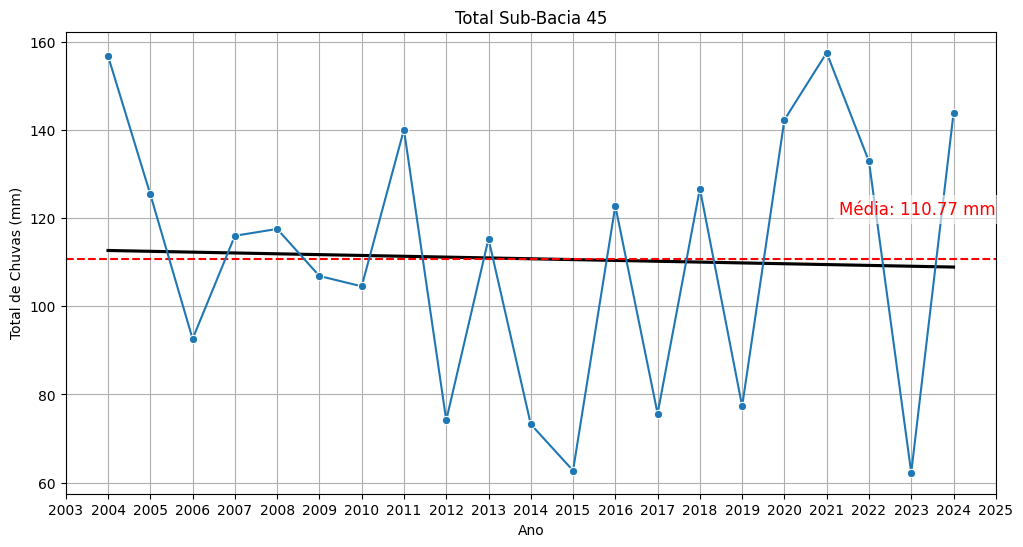

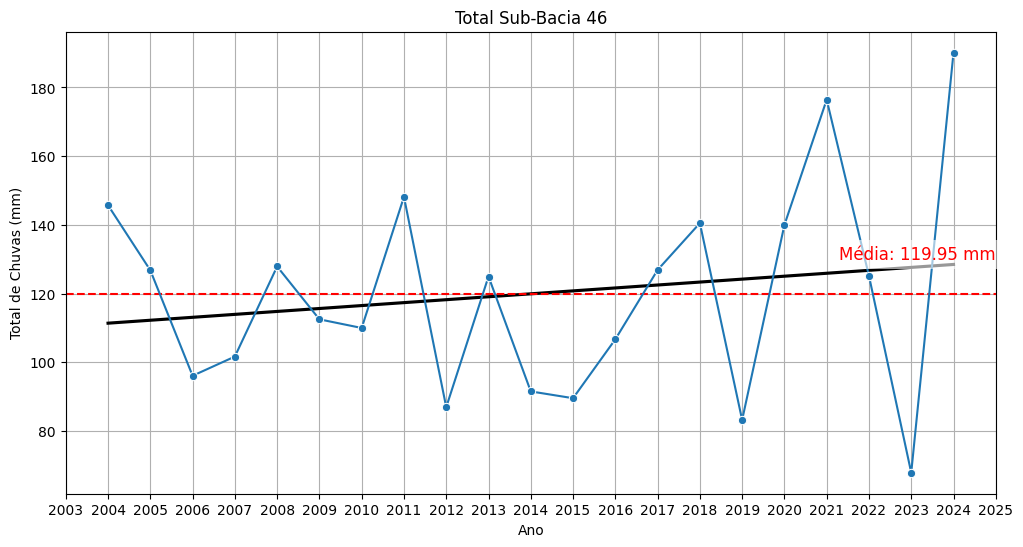

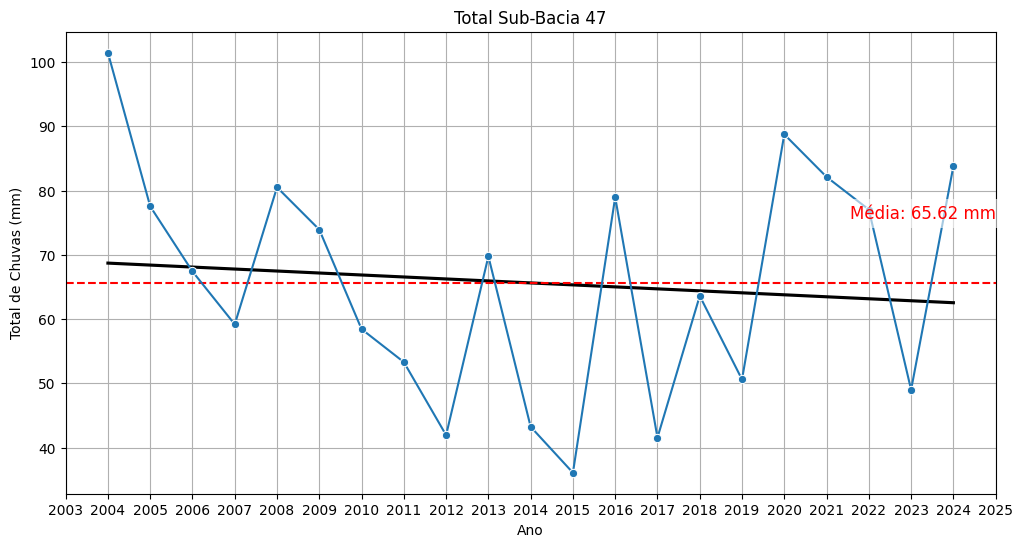

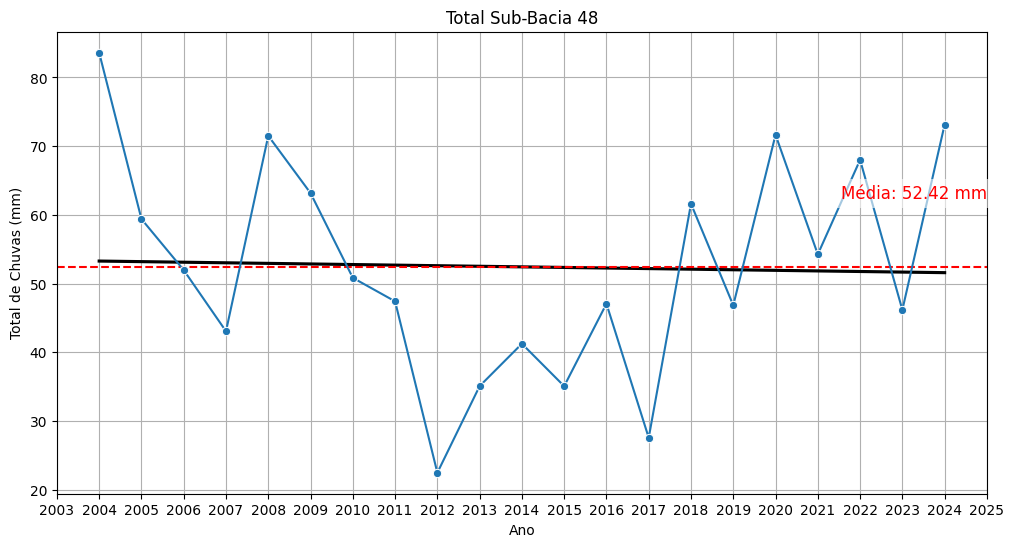

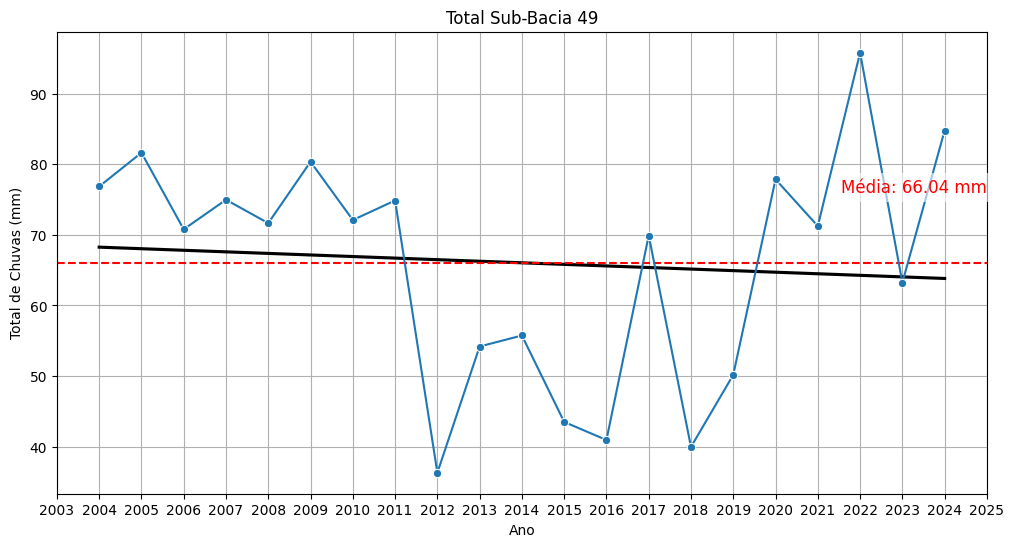

In [31]:
sub_basin_avg = df.groupby("sub_basin").total.mean()

for sub_basin in df.sub_basin.unique():
    plt.figure(figsize=(12, 6))
    sns.regplot(
        data=df[df.sub_basin == sub_basin],
        x="year",
        y="total",
        scatter=False,
        ci=None,
        color="black",
    )  # tendency line
    plt.axhline(sub_basin_avg[sub_basin], color="red", linestyle="--")  # average line
    plt.text(
        x=plt.xlim()[1],
        y=sub_basin_avg[sub_basin] + 10,
        s=f"Média: {sub_basin_avg[sub_basin]:.2f} mm",
        color="red",
        fontsize=12,
        ha="right",
        bbox=dict(
            facecolor="white", alpha=0.6, edgecolor="none"
        ),
    )  # avg label
    sns.lineplot(
        x="year", y="total", marker="o", data=df[df.sub_basin == sub_basin]
    )  # data points
    plt.xticks(df.year)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.xlabel("Ano")
    plt.ylabel("Total de Chuvas (mm)")
    plt.title(f"Total Sub-Bacia {sub_basin}")
    plt.grid(True)
    plt.show()

### Aqui geramos o gráfico do total de chuvas ao longo de toda a bacia.

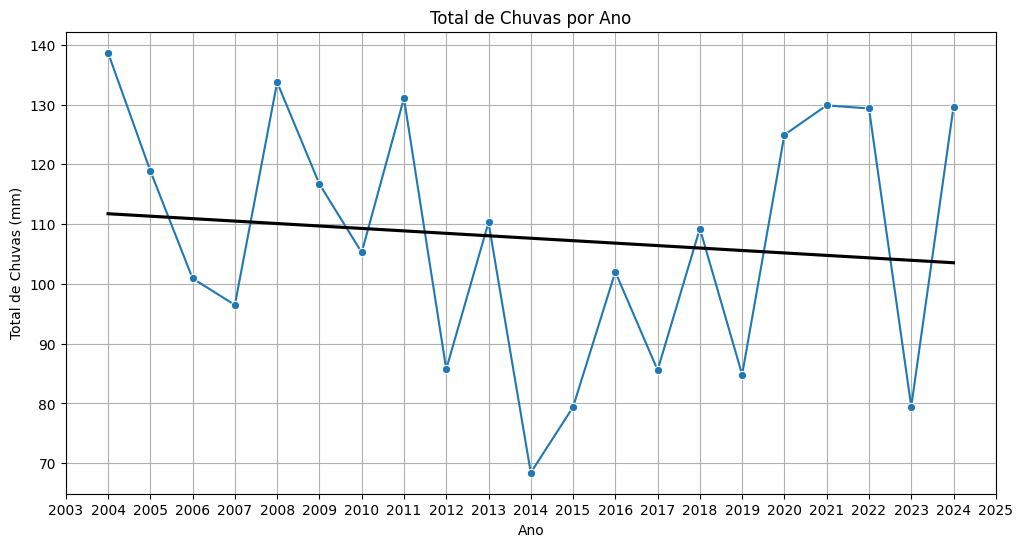

In [32]:
# plot the yearly total averaged across all sub-basins

df = pd.read_csv('chuvas_anual_all.csv')

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='total', marker='o', data=df)
sns.regplot(data=df, x="year", y="total", scatter=False, ci=None, color='black')
plt.xticks(df.year)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.xlabel('Ano')
plt.ylabel('Total de Chuvas (mm)')
plt.title('Total de Chuvas por Ano')
plt.grid(True)
plt.show()

### Por último, as variações percentuais de cada sub-bacia, comparando com o ano anterior.

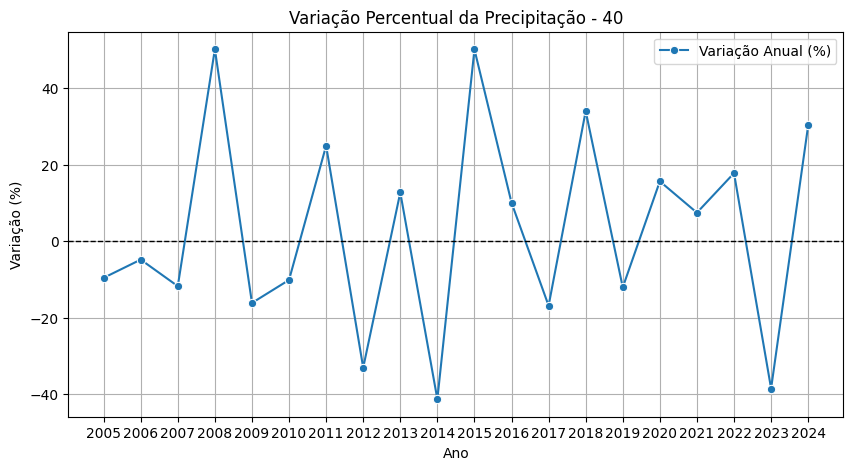

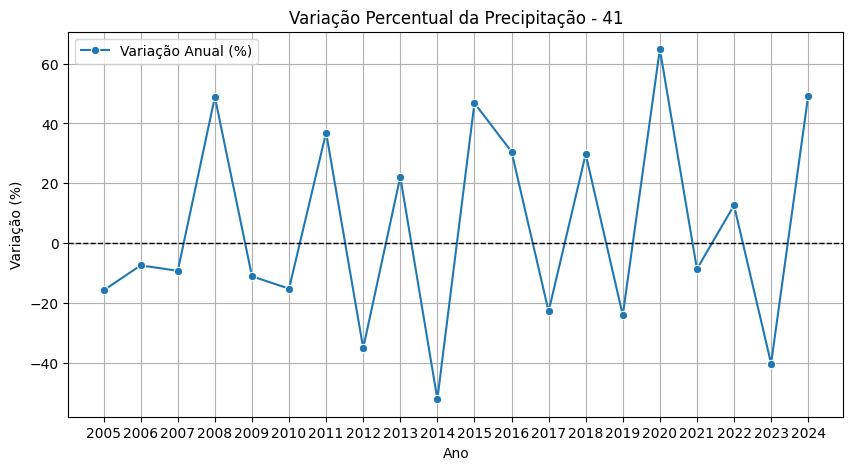

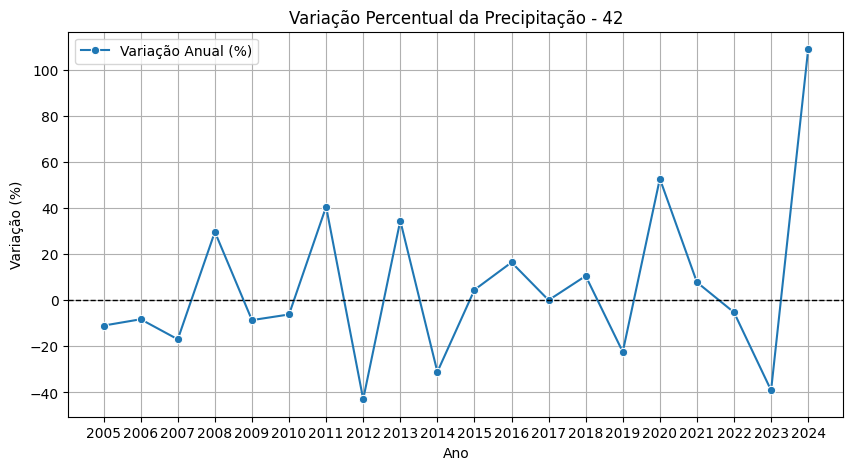

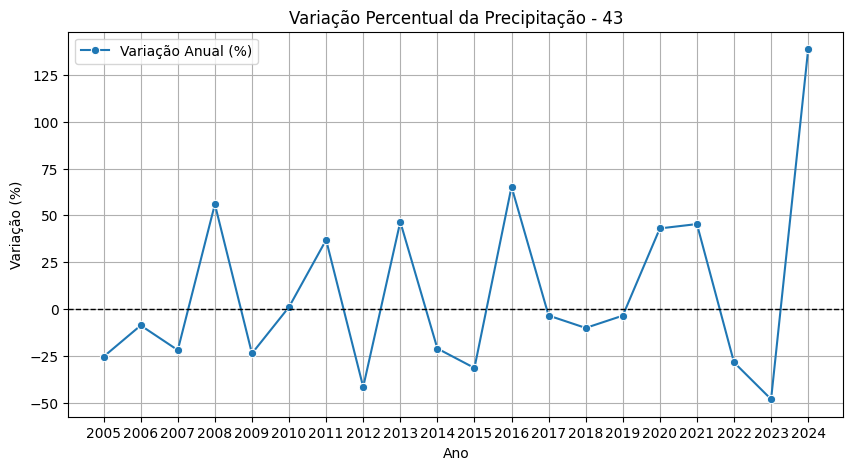

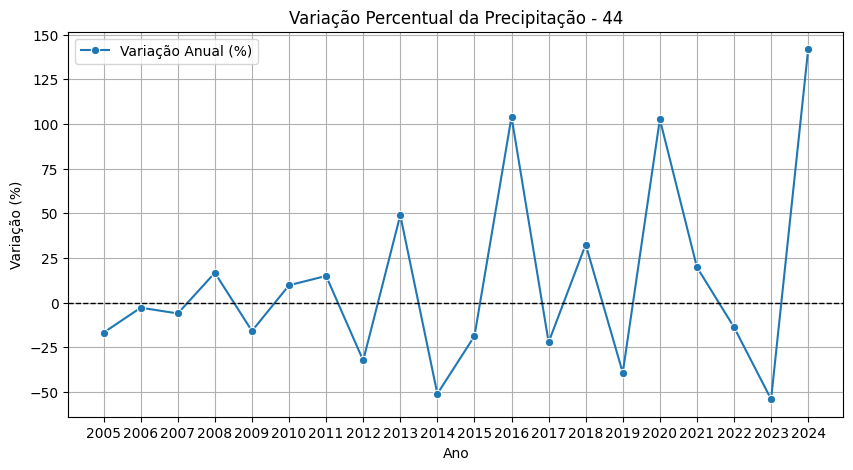

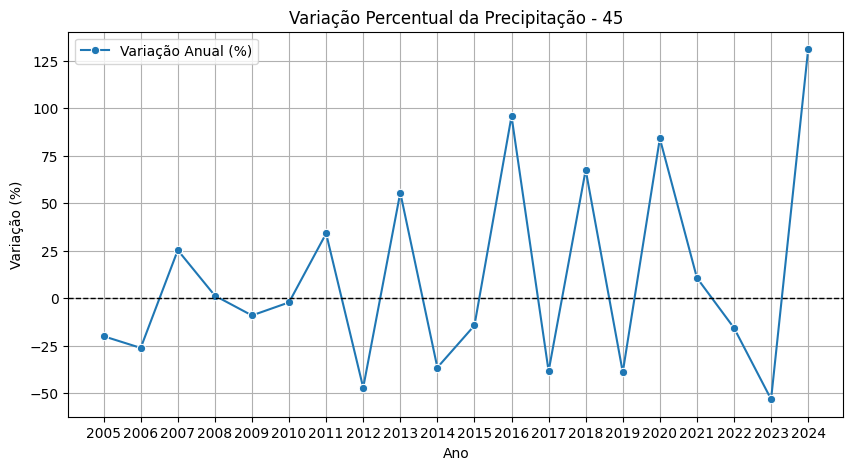

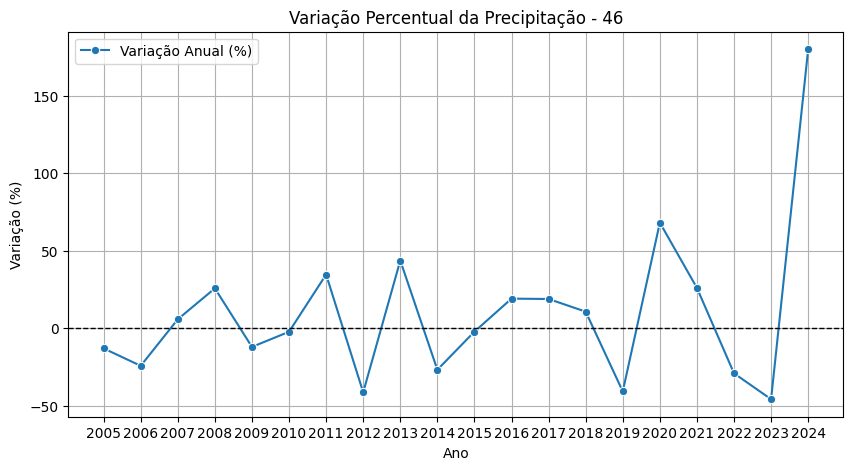

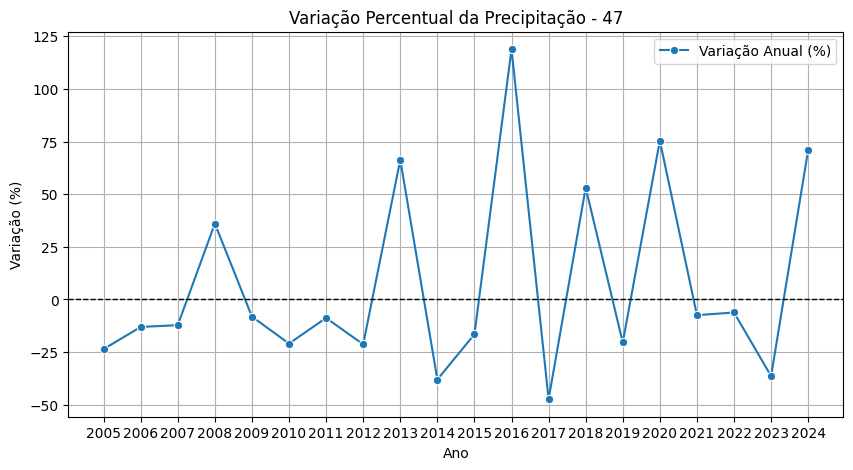

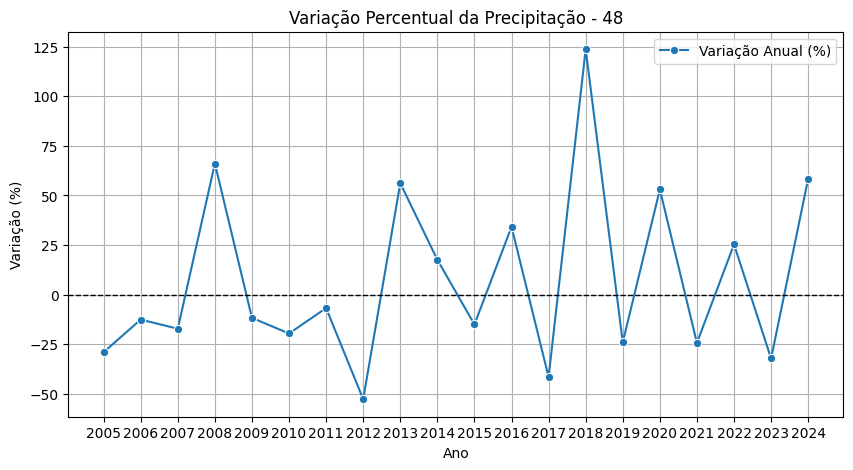

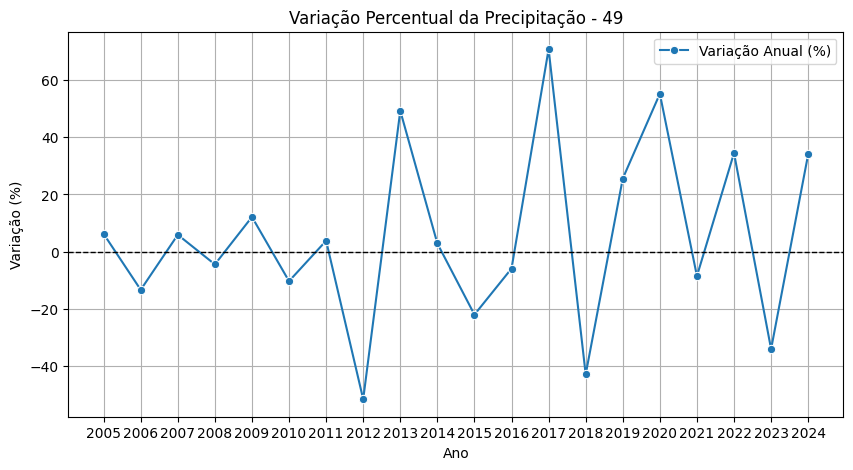

In [33]:
df_annual = pd.read_csv('chuvas_anual.csv')

df_annual["variation"] = df_annual.groupby("sub_basin")["total"].pct_change() * 100

for sub_basin in df_annual["sub_basin"].unique():
    df_sub = df_annual[df_annual["sub_basin"] == sub_basin]
    
    plt.figure(figsize=(10, 5))
    plt.xticks(df_sub["year"])
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
    sns.lineplot(data=df_sub, x="year", y="variation", marker="o", label="Variação Anual (%)")
    
    plt.axhline(0, color="black", linestyle="--", linewidth=1)
    plt.title(f"Variação Percentual da Precipitação - {sub_basin}")
    plt.xlabel("Ano")
    plt.ylabel("Variação (%)")
    plt.grid(True)
    plt.legend()
    plt.show()